In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
#Veri on isleme Adim 1 Goruntulerin yeniden boyulandirilmasi

x_train=x_train.reshape(-1,28,28,1) #-1 goruntunun toplam sayisi
x_test=x_test.reshape(-1,28,28,1)

#Veri on isleme Adim 2 Goruntulerin normalize edilmesi
x_train=x_train.astype('float32')/255.0 #boyle yaptik ki 0 ve 1 arasina dussun
x_test=x_test.astype('float32')/255.0 #boyle yaptik ki 0 ve 1 arasina dussun

print(f"Egitim (Train) Verilerinin Sayisi Ve Bouyutu {x_train.shape}")
print(f"Test Verilerinin Sayisi Ve Bouyutu {x_test.shape}")


Egitim (Train) Verilerinin Sayisi Ve Bouyutu (60000, 28, 28, 1)
Test Verilerinin Sayisi Ve Bouyutu (10000, 28, 28, 1)


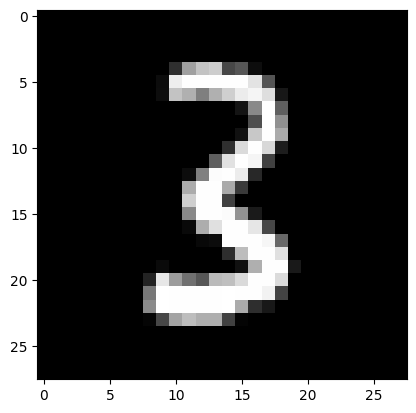

In [4]:
#Cikis Verisi Olarak Bu Girdi Goruntulerinin Hangi Rakami Temsil Ettigini Gosteren Y verilerini Duzenliyoruz

plt.imshow(x_train[50000],cmap='gray')

In [5]:
y_train[50000]

3

In [6]:
#One-Hot Encoding
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

In [7]:
y_train[50000]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [8]:
#Egitim verilerinin %20 sinin dogrulama verisi olarak ayrilmasi buna litaraturde data split islemi denir bu islem genellikle sklearn alindaki traintestsplit fonk ile yapilir
x_train,x_val,y_train_split,y_val=train_test_split(
    x_train,y_train,
    test_size=0.2,
    random_state=42, #rastgelelik islemini biraz sinirli tutuyoruz
    stratify=y_train#restgelee sekilde dagilim yaparken sinif dengesini koruruz
)

In [29]:
#cnn tabanli yapay zeka modelimizi olusturuyoruz
model=keras.Sequential([
    #CNN Ilk Blok
    keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),


    #CNN Ikinci Blok
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),


    #yapay sinir agini ayarliyoruz
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax')
    
])


In [33]:
#Modeli Derliyoruz
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [39]:
model_checkpoint=keras.callbacks.ModelCheckpoint(
    'mnist_classification_cnn_model.h5',
    save_best_only=True,
    mode='max',
    verbose=1
    
    
)

In [45]:
history=model.fit(x_train,y_train_split,validation_data=(x_val,y_val),
                  batch_size=128,epochs=10,callbacks=model_checkpoint)

Epoch 1/10
375/375 [==============================] - ETA: 0s - loss: 0.1884 - accuracy: 0.9443
Epoch 1: val_loss improved from -inf to 4.50729, saving model to mnist_classification_cnn_model.h5
375/375 [==============================] - 50s 132ms/step - loss: 0.1884 - accuracy: 0.9443 - val_loss: 4.5073 - val_accuracy: 0.1487
Epoch 2/10
375/375 [==============================] - ETA: 0s - loss: 0.0643 - accuracy: 0.9803
Epoch 2: val_loss did not improve from 4.50729
375/375 [==============================] - 51s 135ms/step - loss: 0.0643 - accuracy: 0.9803 - val_loss: 0.0405 - val_accuracy: 0.9869
Epoch 3/10
375/375 [==============================] - ETA: 0s - loss: 0.0473 - accuracy: 0.9854
Epoch 3: val_loss did not improve from 4.50729
375/375 [==============================] - 28s 75ms/step - loss: 0.0473 - accuracy: 0.9854 - val_loss: 0.0332 - val_accuracy: 0.9893
Epoch 4/10
375/375 [==============================] - ETA: 0s - loss: 0.0401 - accuracy: 0.9872
Epoch 4: val_loss did 

In [49]:
print("Test Islemi Icin Degerlendirme Yapiliyor")
test_loss,test_accuracy=model.evaluate(x_test,y_test)
print(f"Modelin Loss Performansi={test_loss}")
print(f"Modelin Accuracy Performansi={test_accuracy}")

Test Islemi Icin Degerlendirme Yapiliyor
313/313 [==============================] - 3s 9ms/step - loss: 0.0196 - accuracy: 0.9942
Modelin Loss Performansi=0.019579941406846046
Modelin Accuracy Performansi=0.9941999912261963


In [53]:
print("domuz yukoladdin")

domuz yukoladdin
